In [1]:
import db 
import portfolioReporting
import portfolioVisualization
import sqlite3
import pandas as pd

## setup - run once

In [2]:
dbsetup = db.Db('demo.db')
## if you run seed db more than once it'll duplicate your holdings
dbsetup.seed_db('demo/demo.xlsx')

Creating DB
Database Created


## example - add a trade
1. add the asset type
2. if you're adding stocks you have to use the yahoo finance ticker if crypto coingecko coinname
3. note that the AUD and the gold does not have a price in the prices table for the reporting - so add them 

In [5]:
a = db.Db('demo.db')
#a.insert_asset()
#a.insert_trade()
a.insert_price()

Db exists
Asset Name:
AUD
Asset type:
Cash
Price
1


In [6]:
a.insert_trade()

Asset Name:
AUD
Asset type:
Cash
Purchased Quantity:
5000
Purchase price:
1
transaction type
Deposit


In [15]:
c = portfolioReporting.portfolio('demo.db')
c.portValuation()

[*********************100%***********************]  1 of 1 completed


,AssetID,Exposure,Date,RunID
0,1,59900.001526,07/03/2021 16:12:35,2
1,2,44914.000000,07/03/2021 16:12:35,2
2,3,5000.000000,07/03/2021 16:12:35,2
3,4,4800.000000,07/03/2021 16:12:35,2


## Portfolio value

In [16]:
con = sqlite3.connect('demo.db')
data = pd.read_sql('SELECT * FROM valuation',con)
con.close()
print(data.groupby(by="Type").sum())
data.sort_values(by="Exposure",ascending=False)

            Exposure
Type                
Cash     5000.000000
Crypto  44914.000000
Metals   4800.000000
Stocks  59900.001526


,Asset,Type,Exposure,Date
0,IOZ.AX,Stocks,59900.001526,07/03/2021 16:12:35
1,bitcoin,Crypto,44914.000000,07/03/2021 16:12:35
2,AUD,Cash,5000.000000,07/03/2021 16:12:35
3,Gold,Metals,4800.000000,07/03/2021 16:12:35


In [17]:
con = sqlite3.connect('demo.db')
data = pd.read_sql('SELECT * FROM holdings',con)
con.close()
data

,AssetID,Asset,Type,Quantity
0,1,IOZ.AX,Stocks,2000
1,2,bitcoin,Crypto,1
2,3,AUD,Cash,5000
3,4,Gold,Metals,2


## visualise portfolio

In [18]:
portfolio = portfolioVisualization.portViz('demo.db')

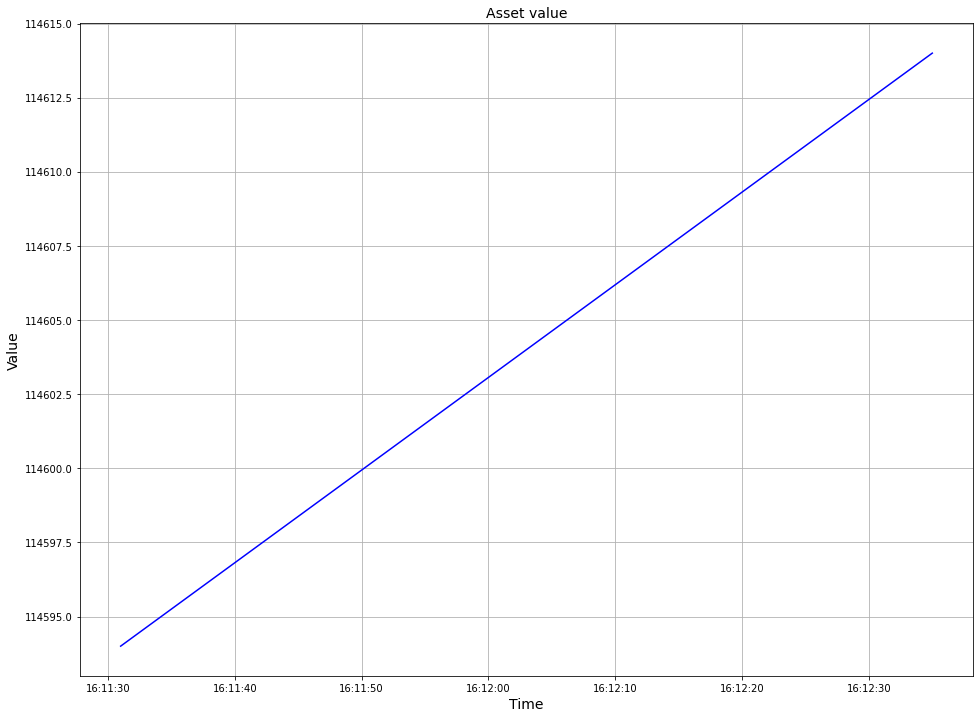

In [19]:
portfolio.portfolioValuation()

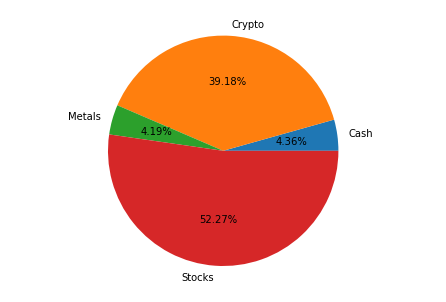

In [14]:
portfolio.byAssetClass()